In [1]:
#importing all the required libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #for KNN classification
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB # for naive bayes classification
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression # for Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics

In [2]:
data = pd.read_csv("HR Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
#creating another copy of original data
data1 = data

In [5]:
num_data = data1.select_dtypes(exclude="object")
num_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [6]:
nominal = pd.get_dummies(data1[["EducationField","Gender","MaritalStatus","Department","OverTime"]],drop_first=True)

In [7]:
le = LabelEncoder()
travel = pd.DataFrame(le.fit_transform(data1["BusinessTravel"]))
role = pd.DataFrame(le.fit_transform(data1["JobRole"]))

In [8]:
travel.columns = ["BusinessTravel"]
role.columns = ["JobRole"]

In [9]:
data2 = pd.concat([num_data,nominal],axis=1)

In [10]:
new_data3 = pd.concat([data2,travel,role],axis=1)

In [11]:
new_data3 = new_data3[new_data3.columns.difference(["Attrition"])]

In [12]:
#creating an object of minmax scaller
min_max_sc = MinMaxScaler()
#fit and transform to the
X4 = pd.DataFrame(min_max_sc.fit_transform(new_data3), columns=new_data3.columns)

# -----------------------------------------------------------------------------------------------------------

In [15]:
#applying label encoding for all the categorical features
for column in data.columns:
    if data[column].dtypes=="object":
        data[column] = le.fit_transform(data[column])

In [16]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
# our dependent variable
Y = data[["Attrition"]]

In [18]:
# taking all the predictors except Attrition column
new_data = data[data.columns.difference(["Attrition"])]

In [19]:
#creating an object of minmax scaller
min_max_sc = MinMaxScaler()
#fit and transform to the
X = pd.DataFrame(min_max_sc.fit_transform(new_data), columns=new_data.columns)

In [20]:
#print top 5 rows after applying min max scaller
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


# •	KNN

In [21]:
#splitting data into traing and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_test.shape

(294, 34)

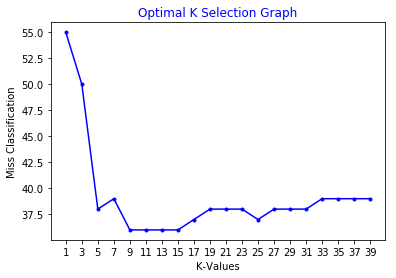

In [23]:
#finding optimal value for k
k_list = [i for i in range(1,40,2)]
miss_class = []
for i in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    knn_classifier.fit(X_train, Y_train)

    y_pred = knn_classifier.predict(X_test)
    cm = confusion_matrix(Y_test,y_pred)
    miss_class.append(cm.sum() - sum(np.diag(cm)))

plt.title("Optimal K Selection Graph", color="b")
plt.plot(k_list,miss_class,marker="o",color="b",markersize=3)
plt.xticks(range(1,40,2))
plt.xlabel("K-Values")
plt.ylabel("Miss Classification")
plt.show()

# Note:
* From the above graph when value of k is 9 then our missclassification also less, less than 42
* Now we will fit our model using k=9

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)

#fitting the knn classifier to the training set
knn_classifier.fit(X_train,Y_train)

y_pred = knn_classifier.predict(X_test)

In [25]:
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[252   3]
 [ 33   6]]


Accuracy Score :  0.8775510204081632


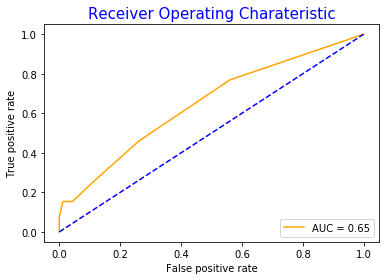

In [26]:
fpr,tpr,threshold = roc_curve(Y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# •	Naïve-Bayes 

In [27]:
X1 = new_data #taking all the features without any scalling
Y1 = data[["Attrition"]]

In [28]:
#splitting data into traing and test set
X_train,X_test,Y_train,Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

### Using Gaussian Naive Bayes Classifier

In [29]:
naive_classifier = GaussianNB()

#fitting the knn classifier to the training set
naive_classifier.fit(X_train,Y_train)

y_pred = naive_classifier.predict(X_test)

In [30]:
#confusion metrics
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[205  40]
 [ 19  30]]


Accuracy Score :  0.7993197278911565


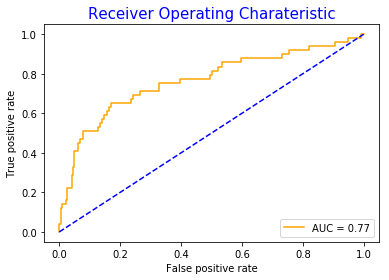

In [31]:
fpr,tpr,threshold = roc_curve(Y_test, naive_classifier.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

### Using Multinomial Naive Bayes Classifer

In [32]:
naive_classifier1 = MultinomialNB()

#fitting the knn classifier to the training set
naive_classifier1.fit(X_train,Y_train)

y_pred = naive_classifier1.predict(X_test)

In [33]:
#confusion metrics
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[124 121]
 [ 20  29]]


Accuracy Score :  0.5204081632653061


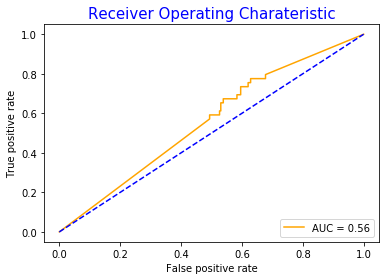

In [34]:
fpr,tpr,threshold = roc_curve(Y_test, naive_classifier1.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

### Using Bernoulli Naive Bayes Classification

In [35]:
naive_classifier2 = BernoulliNB()

#fitting the knn classifier to the training set
naive_classifier2.fit(X_train,Y_train)

y_pred = naive_classifier2.predict(X_test)

In [36]:
#confusion metrics
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[230  15]
 [ 38  11]]


Accuracy Score :  0.8197278911564626


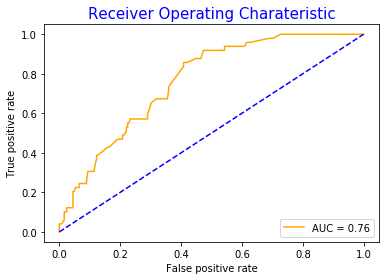

In [37]:
fpr,tpr,threshold = roc_curve(Y_test, naive_classifier2.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# •	Logistic Regression

In [38]:
#splitting data into traing and test set
X_train,X_test,Y_train,Y_test = train_test_split(X4, Y, test_size=0.2, random_state=42)

In [39]:
log_regression = LogisticRegression()

#fitting the knn classifier to the training set
log_regression.fit(X_train,Y_train)

y_pred = log_regression.predict(X_test)

In [40]:
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[252   3]
 [ 26  13]]


Accuracy Score :  0.9013605442176871


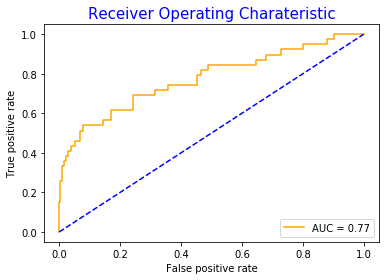

In [41]:
fpr,tpr,threshold = roc_curve(Y_test, log_regression.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# * DECISION TREE CLASSIFICATION:

In [46]:
#splitting data into traing and test set
X_train,X_test,Y_train,Y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [47]:
decision_classifier = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=8,max_depth=4,min_samples_leaf=40)

#fitting the knn classifier to the training set
decision_classifier.fit(X_train,Y_train)

y_pred = decision_classifier.predict(X_test)

In [48]:
print("Confusion Matrix \n",confusion_matrix(Y_test,y_pred))
print("\n")
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))

Confusion Matrix 
 [[250   5]
 [ 38   1]]


Accuracy Score :  0.8537414965986394


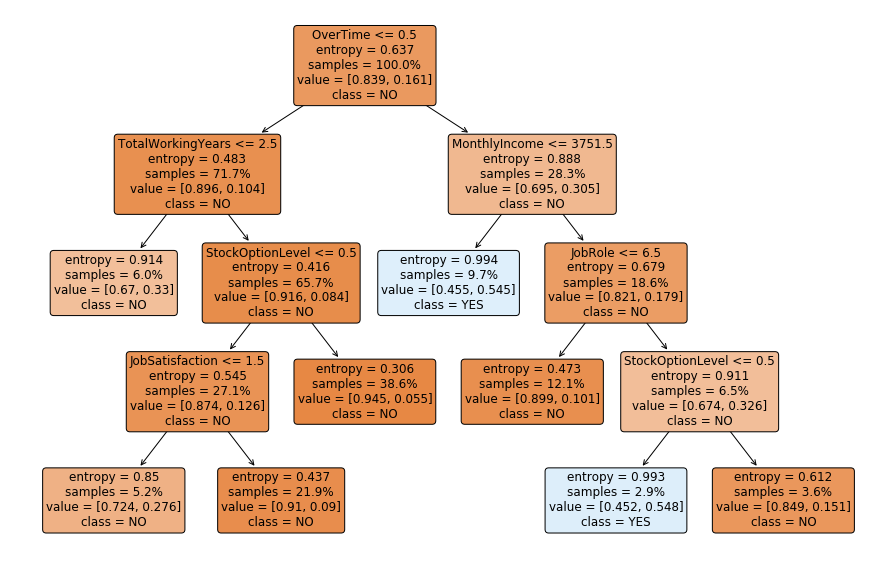

In [50]:
from sklearn import tree
plt.rcParams["figure.figsize"]=15,10

tree.plot_tree(decision_classifier.fit(X1,Y), feature_names=list(X.columns),precision=3,rounded=True,
              filled=True,proportion=True,class_names=["NO","YES"])
plt.show()

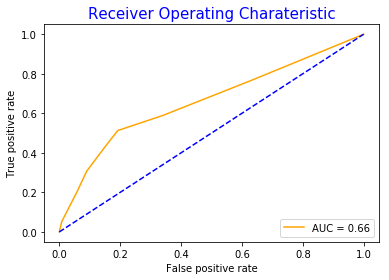

In [51]:
plt.rcParams["figure.figsize"]=6,4
fpr,tpr,threshold = roc_curve(Y_test, decision_classifier.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

# * RANDOM FOREST

In [52]:
#splitting data into traing and test set
X_train,X_test,Y_train,Y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8775510204081632

# ====

In [53]:
A_boost = AdaBoostClassifier(n_estimators=100)
A_boost.fit(X_train,Y_train)
y_pred = A_boost.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8673469387755102

In [54]:
xg_boost = XGBClassifier(n_estimators=100)
xg_boost.fit(X_train,Y_train)
y_pred = xg_boost.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8877551020408163

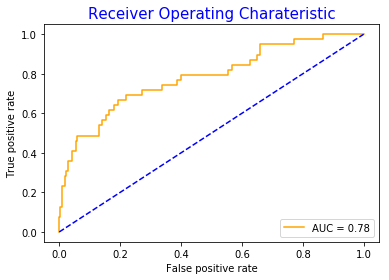

In [55]:
plt.rcParams["figure.figsize"]=6,4
fpr,tpr,threshold = roc_curve(Y_test, xg_boost.predict_proba(X_test)[:,1])
plt.title("Receiver Operating Charateristic",color="b",fontsize=15)
plt.plot(fpr, tpr, color="orange", label = "AUC = %0.2f" %metrics.auc(fpr,tpr))
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [122]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator=xg_boost, X=X_train,y=Y_train,cv=10)
cv.mean()

0.8648597311513735

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>END<<<<<<<<<<<<<<<<<<<<<<<<<<<<<